In [ ]:
def plot_Poly_regression(X,Y,d, xlabel, ylabel):
    
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.scatter(X,Y,marker="x", color = 'steelblue')
    ylim = plt.ylim()
    
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim([X.min()-2,X.max()+2])
    plt.ylim(ylim)
    
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))

# Task 1

## Import Libraries

In [20]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

## Import raw data and merge the data

In [21]:
Nextbike_bochum_raw = pd.read_csv("./dataset/bochum.csv")
Nextbike_leipzig_raw = pd.read_csv("./dataset/leipzig.csv")
Nextbike_raw = Nextbike_bochum_raw.append(Nextbike_leipzig_raw)

Nextbike_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202697 entries, 0 to 185326
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            202697 non-null  object 
 1   time           202697 non-null  object 
 2   b_number       202697 non-null  int64  
 3   city           202697 non-null  object 
 4   trip_duration  202697 non-null  object 
 5   orig_lat       202697 non-null  float64
 6   orig_lng       202697 non-null  float64
 7   dest_lat       202697 non-null  float64
 8   dest_lng       202697 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 15.5+ MB


## Look for null values

In [22]:
Nextbike_raw.isnull().sum().sort_values(ascending=False)

day              0
time             0
b_number         0
city             0
trip_duration    0
orig_lat         0
orig_lng         0
dest_lat         0
dest_lng         0
dtype: int64

In [23]:
#Copy dataset for cleaning
Nextbike_clean = Nextbike_raw

## Correct Data Types

In [24]:
#Converting Trip Length to timedelta
Nextbike_clean['trip_duration'] = pd.to_timedelta(Nextbike_clean['trip_duration'])

#Converting start-time to datetime
Nextbike_clean['timestamp'] = pd.to_datetime(Nextbike_clean['day'] + ' ' +  Nextbike_clean['time'])
Nextbike_clean.drop(columns=['day','time'], inplace = True)

## Add columns for analysis

In [25]:
#Round datetime and extract possible categorisation attributes
Nextbike_clean['timestamp_rounded'] = Nextbike_clean['timestamp'].dt.floor('H')

Nextbike_clean['Weekday'] = Nextbike_clean['timestamp_rounded'].dt.weekday
Nextbike_clean['Week'] = Nextbike_clean['timestamp_rounded'].dt.isocalendar().week

Nextbike_clean['Time'] = Nextbike_clean['timestamp_rounded'].dt.time
Nextbike_clean["Time"] = Nextbike_clean["Time"].astype(str).str[:2].astype(int)

Nextbike_clean["date"] = Nextbike_clean.timestamp.dt.date
Nextbike_clean["date_str"] = Nextbike_clean.timestamp.dt.date.astype(str)

#take trip duration in minutes, calculate 1€ per 30 minutes of usage
Nextbike_clean["revenue"] = np.ceil((Nextbike_clean.trip_duration.dt.total_seconds()/60) /30)


#output
Nextbike_clean

,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_rounded,Weekday,Week,Time,date,date_str,revenue
0,683,bochum,0 days 00:10:00,51.489814,7.232856,51.479592,7.222239,2019-02-08 12:06:00,2019-02-08 12:00:00,4,6,12,2019-02-08,2019-02-08,1.0
1,683,bochum,0 days 00:14:00,51.479592,7.222239,51.472366,7.250500,2019-02-10 01:58:00,2019-02-10 01:00:00,6,6,1,2019-02-10,2019-02-10,1.0
2,683,bochum,0 days 00:28:00,51.472366,7.250500,51.479592,7.222239,2019-02-11 06:33:00,2019-02-11 06:00:00,0,7,6,2019-02-11,2019-02-11,1.0
3,683,bochum,0 days 00:58:00,51.479592,7.222239,51.483023,7.215314,2019-02-11 13:31:00,2019-02-11 13:00:00,0,7,13,2019-02-11,2019-02-11,2.0
4,683,bochum,0 days 00:22:00,51.483023,7.215314,51.479592,7.222239,2019-02-11 14:32:00,2019-02-11 14:00:00,0,7,14,2019-02-11,2019-02-11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185322,99979,leipzig,0 days 00:07:00,51.468822,11.290048,51.468547,11.289899,2019-05-25 10:58:00,2019-05-25 10:00:00,5,21,10,2019-05-25,2019-05-25,1.0
185323,99979,leipzig,0 days 01:16:00,51.468756,11.289723,51.469324,11.289366,2019-05-27 09:32:00,2019-05-27 09:00:00,0,22,9,2019-05-27,2019-05-27,3.0
185324,99979,leipzig,0 days 00:03:00,51.469044,11.289348,51.469093,11.289432,2019-05-27 11:02:00,2019-05-27 11:00:00,0,22,11,2019-05-27,2019-05-27,1.0
185325,99982,leipzig,0 days 01:44:00,51.341165,12.365045,51.341065,12.365005,2019-02-11 11:47:00,2019-02-11 11:00:00,0,7,11,2019-02-11,2019-02-11,4.0




# Task 2

## Import Visualisation Libaries

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Split data for analysis

In [27]:
Nextbike_clean_l = Nextbike_clean[Nextbike_clean.city == "leipzig"]
Nextbike_clean_b = Nextbike_clean[Nextbike_clean.city == "bochum"]

df = Nextbike_clean_l[:]

## Find out size of the fleet
The idea is that a bike is recognized as part of the fleet if it has been rented in the last 7 days. So the size of the fleet is the amount of unique Bike IDs that have records for the last 7 days. We calculate this on a daily level to be precise yet not too intense to compute.

In [28]:
start_date = df.date.min()
end_date = df.date.max()
delta = pd.to_timedelta("1d")

dates = []
while start_date <= end_date:
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta


fleet_size = pd.DataFrame([], index = dates, columns = ["search_array","fleet_size"]) 

search_array = []
for index, row in fleet_size.iterrows():
    search_array.append(index)
    if len(search_array) > 7:
        search_array.pop(0)
    #row["date_str"] = index
    row['search_array'] = search_array[:]
    row['fleet_size'] = df[df.date.astype(str).isin(search_array[:])].b_number.nunique()
    
fleet_size.drop(columns=["search_array"], inplace = True)

## Analysis for revenue and fleet size

In [29]:
df_by_date = df.groupby("date_str").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    date=("date","min"),
    used_bikes=('b_number', pd.Series.nunique))

fleet_size.index.astype(str, copy= False)
df_by_date["date_str"] = df_by_date["date"].astype(str)

df_by_date["date_float"] = (df_by_date["date"] - df_by_date["date"].min())  / np.timedelta64(1,'D')

df_by_date_merged = fleet_size.join(df_by_date)
df_by_date_merged["usage"] = df_by_date_merged["used_bikes"] / df_by_date_merged["fleet_size"]
df_by_date_merged["revenue_pro_bike"] = df_by_date_merged["revenue"] / df_by_date_merged["fleet_size"]
df_by_date_merged["revenue_pro_trip"] = df_by_date_merged["revenue"] / df_by_date_merged["trips"]


df_by_date_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 2019-02-01 to 2019-06-30
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fleet_size        150 non-null    object 
 1   revenue           147 non-null    float64
 2   trips             147 non-null    float64
 3   date              147 non-null    object 
 4   used_bikes        147 non-null    float64
 5   date_str          147 non-null    object 
 6   date_float        147 non-null    float64
 7   usage             147 non-null    object 
 8   revenue_pro_bike  147 non-null    object 
 9   revenue_pro_trip  147 non-null    float64
dtypes: float64(5), object(5)
memory usage: 17.0+ KB


In [30]:
#Using scikit-learn library for fitting a polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [31]:
df_by_hour = df.groupby("timestamp_rounded").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    date=("date","min"),
    weekday=("Weekday","min"),
    week = ("Week","min"),
    time = ("Time","min"),
    used_bikes=('b_number', pd.Series.nunique))

fleet_size.index.astype(str, copy= False)
df_by_hour["date_str"] = df_by_hour["date"].astype(str)


#df_by_hour_merged = df_by_hour.join(fleet_size)
df_by_hour_merged = pd.merge(df_by_hour, fleet_size, right_index=True, left_on='date_str')
df_by_hour_merged["usage"] = df_by_hour_merged["used_bikes"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["revenue_pro_bike"] = df_by_hour_merged["revenue"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["revenue_pro_trip"] = df_by_hour_merged["revenue"] / df_by_hour_merged["trips"]


df_by_hour_merged

,revenue,trips,date,weekday,week,time,used_bikes,date_str,fleet_size,usage,revenue_pro_bike,revenue_pro_trip
timestamp_rounded,,,,,,,,,,,,
2019-02-01 00:00:00,9.0,8,2019-02-01,4,5,0,8,2019-02-01,256,0.031250,0.035156,1.125000
2019-02-01 01:00:00,9.0,7,2019-02-01,4,5,1,7,2019-02-01,256,0.027344,0.035156,1.285714
2019-02-01 02:00:00,7.0,2,2019-02-01,4,5,2,2,2019-02-01,256,0.007812,0.027344,3.500000
2019-02-01 03:00:00,3.0,3,2019-02-01,4,5,3,3,2019-02-01,256,0.011719,0.011719,1.000000
2019-02-01 04:00:00,9.0,8,2019-02-01,4,5,4,8,2019-02-01,256,0.031250,0.035156,1.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30 19:00:00,116.0,91,2019-06-30,6,26,19,86,2019-06-30,790,0.108861,0.146835,1.274725
2019-06-30 20:00:00,104.0,87,2019-06-30,6,26,20,82,2019-06-30,790,0.103797,0.131646,1.195402
2019-06-30 21:00:00,82.0,66,2019-06-30,6,26,21,62,2019-06-30,790,0.078481,0.103797,1.242424


In [37]:
df_by_date_merged

,fleet_size,revenue,trips,date,used_bikes,date_str,date_float,usage,revenue_pro_bike,revenue_pro_trip
2019-02-01,256,785.0,659.0,2019-02-01,256.0,2019-02-01,0.0,1.000000,3.066406,1.191199
2019-02-02,329,664.0,526.0,2019-02-02,241.0,2019-02-02,1.0,0.732523,2.018237,1.262357
2019-02-03,350,352.0,285.0,2019-02-03,162.0,2019-02-03,2.0,0.462857,1.005714,1.235088
2019-02-04,390,623.0,499.0,2019-02-04,237.0,2019-02-04,3.0,0.607692,1.597436,1.248497
2019-02-05,421,654.0,573.0,2019-02-05,251.0,2019-02-05,4.0,0.596200,1.553444,1.141361
...,...,...,...,...,...,...,...,...,...,...
2019-06-26,785,3039.0,2552.0,2019-06-26,585.0,2019-06-26,145.0,0.745223,3.871338,1.190831
2019-06-27,787,2993.0,2555.0,2019-06-27,600.0,2019-06-27,146.0,0.762389,3.803050,1.171429
2019-06-28,789,3417.0,2857.0,2019-06-28,627.0,2019-06-28,147.0,0.794677,4.330798,1.196010
2019-06-29,795,3737.0,2780.0,2019-06-29,625.0,2019-06-29,148.0,0.786164,4.700629,1.344245


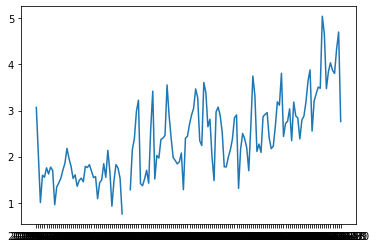

In [41]:
plt.plot(df_by_date_merged.index,df_by_date_merged.revenue_pro_bike)
#Erklärungen: Time/Fahrt?

In [33]:
#polynomial regression for hourly usage

xh = df_by_hour_merged["time"].values
yh = df_by_hour_merged["usage"].values

The R^2 for quadratic curve is:  0.5274967169788651


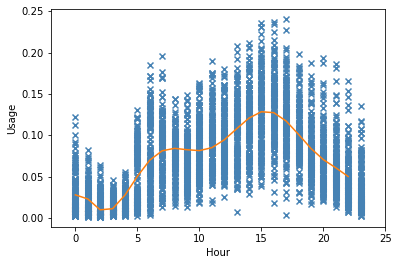

In [214]:
plot_Poly_regression(X = xh, Y = yh,d = 10,xlabel="Hour",ylabel="Usage")

In [34]:
#a polynomial regression for weekly usage
xwu = df_by_hour_merged["weekday"].values * 24 + df_by_hour_merged["time"].values + 1
ywu = df_by_hour_merged["usage"].values

The R^2 for quadratic curve is:  0.04085401382156428


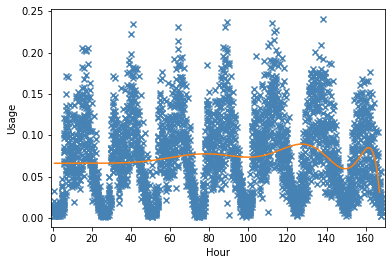

In [36]:
plot_Poly_regression(X = xwu, Y = ywu,d = 13,xlabel="Hour",ylabel="Usage")

In [285]:
df_by_date_merged = df_by_date_merged.dropna()

#a polynomial regression for monthly usage
xmu = df_by_date_merged["date_float"].values 
ymu = df_by_date_merged["usage"].values


def plot_Poly_regression(X,Y,d):
    
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.scatter(X,Y,marker="x", color = 'steelblue')
    ylim = plt.ylim()
    
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Day")
    plt.ylabel("Usage")
    plt.xlim([X.min()-2,X.max()+2])
    plt.ylim(ylim)
    
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))


The R^2 for quadratic curve is:  0.3509821662815008


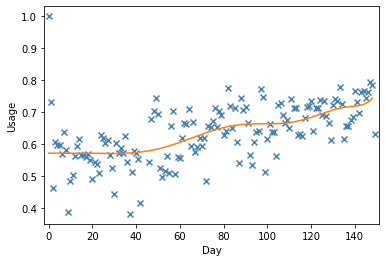

In [286]:
plot_Poly_regression(X = xmu, Y = ymu,d = 10)

In [218]:
#a polynomial regression for daily revenue pro bike

xdb = df_by_hour_merged["time"].values
ydb = df_by_hour_merged["revenue_pro_bike"].values


def plot_Poly_regression(X,Y,d):
    
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.scatter(X,Y,marker="x", color = 'steelblue')
    ylim = plt.ylim()
    
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Hour")
    plt.ylabel("Revenue pro Bike")
    plt.xlim([X.min()-2,X.max()+2])
    plt.ylim(ylim)
    
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))

The R^2 for quadratic curve is:  0.515851891793335


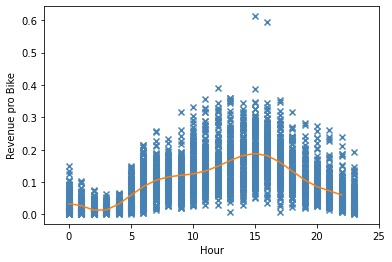

In [224]:
plot_Poly_regression(X = xdb, Y = ydb,d = 10)

In [225]:
#a polynomial regression for weekly revenue pro bike
xwb = df_by_hour_merged["weekday"].values * 24 + df_by_hour_merged["time"].values + 1
ywb = df_by_hour_merged["revenue_pro_bike"].values


def plot_Poly_regression(X,Y,d):
    
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.scatter(X,Y,marker="x", color = 'steelblue')
    ylim = plt.ylim()
    
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Hour")
    plt.ylabel("Revenue pro Bike")
    plt.xlim([X.min()-2,X.max()+2])
    plt.ylim(ylim)
    
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))


The R^2 for quadratic curve is:  0.0506643030207663


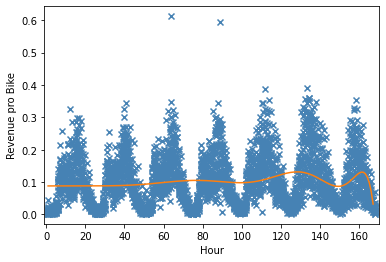

In [226]:
plot_Poly_regression(X = xwb, Y = ywb,d = 13)

In [227]:
#a polynomial regression for daily revenue pro trip

xdt = df_by_hour_merged["time"].values
ydt = df_by_hour_merged["revenue_pro_trip"].values


def plot_Poly_regression(X,Y,d):
    
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.scatter(X,Y,marker="x", color = 'steelblue')
    ylim = plt.ylim()
    
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Hour")
    plt.ylabel("Revenue pro Trip")
    plt.xlim([X.min()-2,X.max()+2])
    plt.ylim(ylim)
    
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))

The R^2 for quadratic curve is:  0.1376600804634206


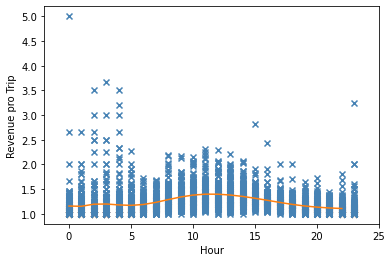

In [229]:
plot_Poly_regression(X = xdt, Y = ydt,d = 10)

In [230]:
#a polynomial regression for weekly revenue pro trip
xwt = df_by_hour_merged["weekday"].values * 24 + df_by_hour_merged["time"].values + 1
ywt = df_by_hour_merged["revenue_pro_trip"].values


def plot_Poly_regression(X,Y,d):
    
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    lin_reg_Poly = LinearRegression()
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.scatter(X,Y,marker="x", color = 'steelblue')
    ylim = plt.ylim()
    
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Hour")
    plt.ylabel("Revenue pro Trip")
    plt.xlim([X.min()-2,X.max()+2])
    plt.ylim(ylim)
    
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))


The R^2 for quadratic curve is:  0.044015843787145625


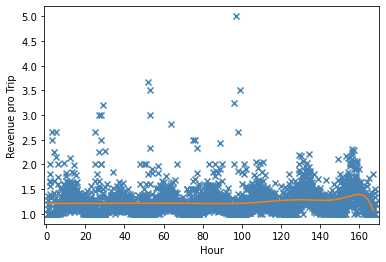

In [231]:
plot_Poly_regression(X = xwt, Y = ywt,d = 13)